In [48]:
from rna2d.pipelines import Pipeline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
%autoreload
p = Pipeline("/data/2d-rna/validation-all-non0/results.rpt")
methods, indeces = p.run_for_all()

In [50]:
%autoreload
nm, ci = p.filter_by_molecules(methods, indeces, "../metadata/representants.txt")

In [51]:
with open("../metadata/representants.txt") as f:
    repres = f.readlines()

repres = [r.strip() for r in repres]
print(f'All representants: {len(repres)}')
repres = [r for r in repres if '-' not in r]
print(f'Single-strand only: {len(repres)}')


All representants: 1646
Single-strand only: 1254


Remove SPOT-RNA training set sequences

In [52]:
import os
train_pdbs = "../external-files/PDB_dataset/TR1_sequences/"
def get_pdb_ids(path):
    pdbs = os.listdir(path)
    pdbs = [p.replace("-", "_") for p in pdbs]
    pdbs = [f'{p[:4].upper()}{p[4:]}' for p in pdbs]
    return pdbs

trpdbs = get_pdb_ids(train_pdbs)
print(trpdbs[:10])
print(f'Training set pdbs: {len(trpdbs)}')
removed = set(repres).intersection(set(trpdbs))
repres = set(repres).difference(set(trpdbs))
print(f'Removed pdbs: {len(removed)}')
print(f'Representants after filtering: {len(repres)}')


['3SKI_1_A', '2HVY_1_E', '4PMI_1_A', '1FFK_1_9', '2CSX_1_C', '2ZNI_1_C', '4Y1J_1_A', '4KZD_1_R', '4V83_1_AV', '2A64_1_A']
Training set pdbs: 120
Removed pdbs: 57
Representants after filtering: 1197


In [53]:
import pandas as pd
tool = 'spot-rna'
common_ind = set(indeces[tool])
common_ind = list(common_ind.intersection(repres))
df = pd.DataFrame(methods[tool], columns=[
                  'PPV', 'TPR', 'F1', 'INF'], index=indeces[tool])
res = df.loc[common_ind]
x = df.loc[df['INF']>0.9].head(100).tail()
print(
    f"All indeces: {len(indeces[tool])}, Representants: {len(repres)}, Intersection: {len(common_ind)}")
print(f"Before filtering: {df['INF'].mean()}")
print(f"After filtering: {res['INF'].mean()}")
print(x)


All indeces: 7354, Representants: 1197, Intersection: 497
Before filtering: 0.7148357356540642
After filtering: 0.6723179074446684
              PPV  TPR     F1    INF
1RC7_1_B-C  0.900  1.0  0.947  0.949
1RC7_1_D-E  0.900  1.0  0.947  0.949
1RKJ_1_B    0.857  1.0  0.923  0.926
1ROQ_1_A    1.000  1.0  1.000  1.000
1RPU_1_C-D  0.900  1.0  0.947  0.949


In [54]:
%autoreload
from rna2d.utils import get_names
tool = 'spot-rna'
common_ind = set(indeces[tool])
common_ind = list(common_ind.intersection(repres))
print(f'Common ids: {len(common_ind)}')
res = {}
for k in get_names():
    df = pd.DataFrame(methods[k], columns=[
                  'PPV', 'TPR', 'F1', 'INF'], index=indeces[k])
    res[k] =  df.loc[common_ind]

Common ids: 497


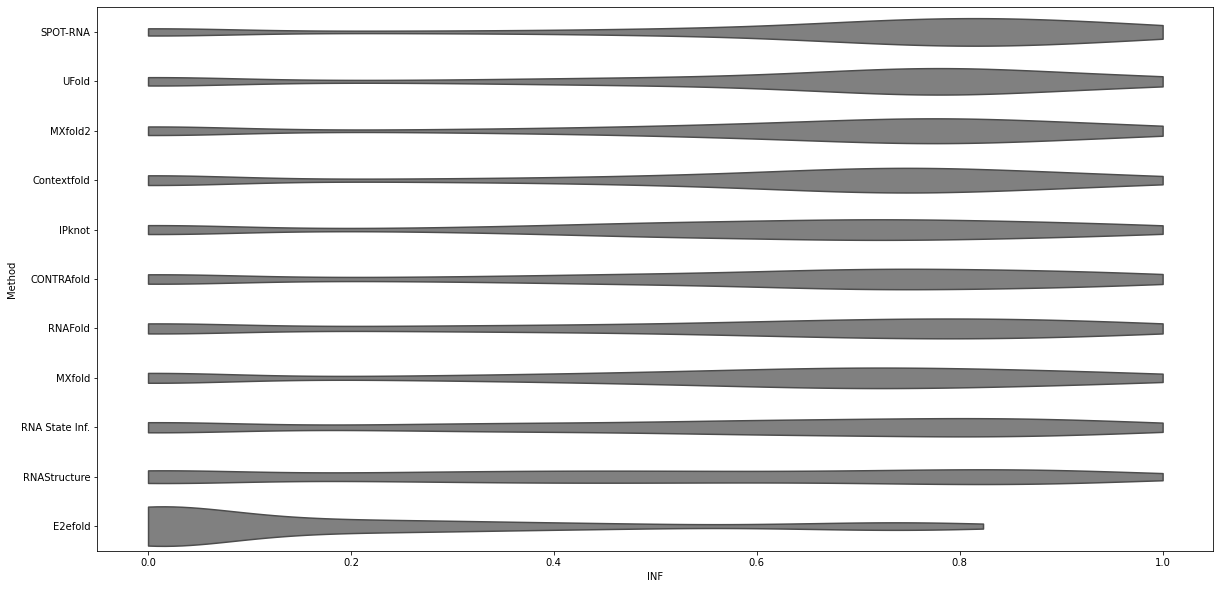

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from rna2d.utils import get_sns_data, get_means_stds, get_DataFrames

%autoreload
means, stds, dfs = get_means_stds(res, indeces)
dfmeans, dfstds = get_DataFrames(means, stds, name='nwc')

d = get_sns_data(res, dfmeans, get_names())

fig, axs = plt.subplots(1, figsize=(20, 10))
ax = sns.violinplot(x='INF', y='Method', inner=None, color='grey', data=d, ax=axs, cut=0)

In [56]:
dfmeans

,PPV,TPR,F1,INF
spot-rna,0.57,0.80,0.66,0.67
ufold,0.53,0.76,0.61,0.63
mxfold2,0.52,0.76,0.60,0.62
contextFold,0.48,0.74,0.57,0.59
ipknot,0.48,0.72,0.56,0.58
contrafold,0.49,0.70,0.57,0.58
rnafold,0.49,0.68,0.56,0.57
mxfold,0.46,0.71,0.55,0.57
rna-state-inf,0.47,0.67,0.54,0.55
rna-structure,0.40,0.58,0.47,0.48


In [57]:
res['e2efold']

,PPV,TPR,F1,INF
6TQA_1_G,0.000,0.000,0.000,0.000
6ZVI_1_e,0.514,0.947,0.667,0.698
7L0Z_1_G,0.243,0.500,0.327,0.349
5E81_1_1K,0.094,0.214,0.130,0.142
6KYV_1_G,0.300,0.750,0.429,0.474
...,...,...,...,...
7MSF_1_R,0.000,0.000,0.000,0.000
6PRV_1_A,0.000,0.000,0.000,0.000
6DB9_1_R,0.154,0.286,0.200,0.210
7D7V_1_A,0.136,0.429,0.207,0.242


Sequence Length analysis

In [58]:
p = '/data/2d-rna/dbn-cifs/'
leng_pdb = []
for fi in common_ind:
    with open(os.path.join(p, f'{fi}.dbn')) as f:
        line_leng = len(f.readlines()[-1])
        leng_pdb.append(line_leng)

(array([143.,  84.,  64., 118.,  33.,  31.,  10.,   4.,   4.,   3.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 11.,  30.,  49.,  68.,  87., 106., 125., 144., 163., 182., 201.,
        220., 239., 258., 277., 296., 315., 334., 353., 372., 391.]),
 <a list of 20 Patch objects>)

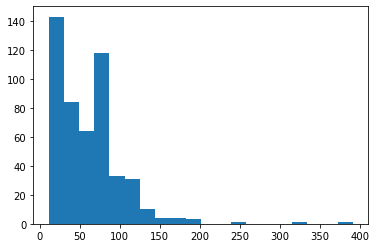

In [59]:
import numpy as np

arr = np.array(leng_pdb)
arr = arr[arr<500]
plt.hist(arr, bins=20)